In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

2023-09-16 00:33:01.648918: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-16 00:33:01.788883: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-16 00:33:02.444643: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
X_train = np.loadtxt('Image Classification CNN Keras Dataset/input.csv', delimiter=',')
Y_train = np.loadtxt('Image Classification CNN Keras Dataset/labels.csv', delimiter=',')

X_test = np.loadtxt('Image Classification CNN Keras Dataset/input_test.csv', delimiter=',')
Y_test = np.loadtxt('Image Classification CNN Keras Dataset/labels_test.csv', delimiter=',')

In [3]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [4]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

2023-09-16 00:33:14.084384: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-16 00:33:14.155021: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-16 00:33:14.155237: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [5]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [6]:
model.fit(X_train, Y_train, epochs = 50, batch_size = 64)

Epoch 1/50


2023-09-16 00:33:15.333148: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-09-16 00:33:15.791765: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-09-16 00:33:15.853631: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f5e025739a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-16 00:33:15.853658: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti Laptop GPU, Compute Capability 8.6
2023-09-16 00:33:15.873435: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-09-16 00:33:16.023221: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lif

32/32 [==============================] - 5s 57ms/step - loss: 0.7292 - accuracy: 0.5045
Epoch 2/50
32/32 [==============================] - 1s 39ms/step - loss: 0.6870 - accuracy: 0.5670
Epoch 3/50
32/32 [==============================] - 1s 39ms/step - loss: 0.6619 - accuracy: 0.6160
Epoch 4/50
32/32 [==============================] - 1s 40ms/step - loss: 0.6124 - accuracy: 0.6700
Epoch 5/50
32/32 [==============================] - 1s 41ms/step - loss: 0.5774 - accuracy: 0.6960
Epoch 6/50
32/32 [==============================] - 1s 41ms/step - loss: 0.5128 - accuracy: 0.7575
Epoch 7/50
32/32 [==============================] - 1s 39ms/step - loss: 0.4780 - accuracy: 0.7635
Epoch 8/50
32/32 [==============================] - 1s 40ms/step - loss: 0.4333 - accuracy: 0.8090
Epoch 9/50
32/32 [==============================] - 1s 39ms/step - loss: 0.3779 - accuracy: 0.8305
Epoch 10/50
32/32 [==============================] - 1s 39ms/step - loss: 0.3719 - accuracy: 0.8330
Epoch 11/50
32/32 [=

In [7]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 13ms/step - loss: 2.0994 - accuracy: 0.6775


[2.099438428878784, 0.6775000095367432]

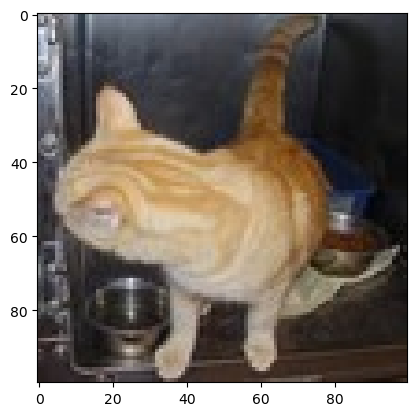

1/1 [==============================] - 0s 184ms/step
Model predicts as a:  cat


In [8]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred>0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
print("Model predicts as a: ",pred)